In [1]:
from HARK.rewards import CRRAutility_inv
from time import time
import matplotlib.pyplot as plt
import numpy as np
from HARK.ConsumptionSaving.ConsMedModel import MedShockConsumerType

In [2]:
mystr = lambda number: "{:.4f}".format(number)

In [3]:
do_simulation = True

This module defines consumption-saving models in which an agent faces medical expenditures and the optimal spending is shared between consumption and medical care.

In this model, the agent consumes two goods: an ordinary composite consumption and medical care, which yield CRRAutility, and the coefficients on the goods might be different. The agent expects to receive shocks to permanent and transitory income as well as multiplicative shocks to utility from medical care (medical need shocks).

The agent's problem can be written in Bellman form as:

\begin{eqnarray*}
v_t(M_t,p_t, medShk_t) &=& \max_{c_t, med_t} U(c_t, med_t) + \beta (1-\mathsf{D}_{t+1}) \mathbb{E} [v_{t+1}(M_{t+1}, p_{t+1}, medShk_{t+1})], \\
a_t &=& M_t - c_t, \\
a_t &\geq& \underline{a}, \\
M_{t+1} &=& R a_t + \theta_{t+1}, \\
p_{t+1} &=& \gimel_{t+1}(p_t)\psi_{t+1}, \\
medShk_{t+1} &=&   ,\\
\psi_t \sim F_{\psi t} &\qquad&  \theta_t \sim F_{\theta t}, \mathbb{E} [F_{\psi t}] = 1, \\
U(c, med) &=& \frac{c^{1-\rho}}{1-\rho}\frac{med^{1-\rho_{med}}}{1-\rho_{med}}.
\end{eqnarray*}

The one period problem for this model is solved by the function $\texttt{solveConsMedShock}$, which creates an instance of the class $\texttt{ConsMedShockSolver}$. The class $\texttt{MedShockConsumerType}$ extends $\texttt{PersistentShockConsumerType}$ from $\texttt{GenIncProcessModel}$ to represents agents in this model.

In [4]:
# Make and solve an example medical shocks consumer type
MedicalExample = MedShockConsumerType()
t_start = time()
MedicalExample.solve()
t_end = time()
print("Solving a medical shocks consumer took " + mystr(t_end - t_start) + " seconds.")

Solving a medical shocks consumer took 0.1765 seconds.


/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/ConsumptionSaving/ConsMedModel.py:709: RuntimeWarning: divide by zero encountered in power
  vPgrid = cLvlGrid ** (-self.CRRA)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/rewards.py:40: RuntimeWarning: divide by zero encountered in reciprocal
  return c ** (1.0 - rho) / (1.0 - rho)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/rewards.py:40: RuntimeWarning: divide by zero encountered in power
  return c ** (1.0 - rho) / (1.0 - rho)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/ConsumptionSaving/ConsMedModel.py:728: RuntimeWarning: invalid value encountered in multiply
  vGrid = utility(cLvlGrid, rho=self.CRRA) + MedShkGrid_tiled * utility(


Consumption function by medical need shock (constant permanent income)


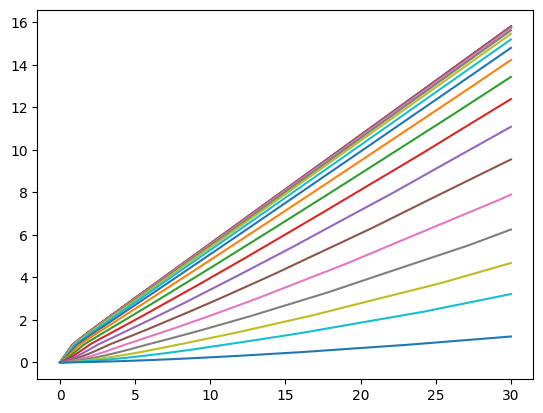

In [5]:
# Plot the consumption function
M = np.linspace(0, 30, 300)
pLvl = 1.0
P = pLvl * np.ones_like(M)
for j in range(MedicalExample.MedShkDstn[0].pmv.size):
    MedShk = MedicalExample.MedShkDstn[0].atoms.flatten()[j] * np.ones_like(M)
    M_temp = M + MedicalExample.solution[0].mLvlMin(pLvl)
    C = MedicalExample.solution[0].cFunc(M_temp, P, MedShk)
    plt.plot(M_temp, C)
print("Consumption function by medical need shock (constant permanent income)")
plt.show()

Medical care function by medical need shock (constant permanent income)


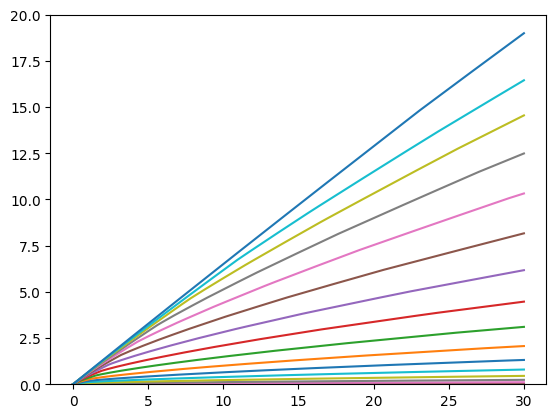

In [6]:
# Plot the medical care function
for j in range(MedicalExample.MedShkDstn[0].pmv.size):
    MedShk = MedicalExample.MedShkDstn[0].atoms.flatten()[j] * np.ones_like(M)
    Med = MedicalExample.solution[0].MedFunc(M_temp, P, MedShk)
    plt.plot(M_temp, Med)
print("Medical care function by medical need shock (constant permanent income)")
plt.ylim([0, 20])
plt.show()

End of period savings by medical need shock (constant permanent income)


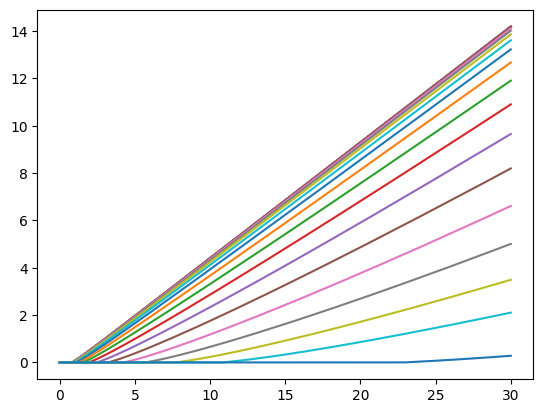

In [7]:
# Plot the savings function
for j in range(MedicalExample.MedShkDstn[0].pmv.size):
    MedShk = MedicalExample.MedShkDstn[0].atoms.flatten()[j] * np.ones_like(M)
    Sav = (
        M_temp
        - MedicalExample.solution[0].cFunc(M_temp, P, MedShk)
        - MedicalExample.MedPrice[0]
        * MedicalExample.solution[0].MedFunc(M_temp, P, MedShk)
    )
    plt.plot(M_temp, Sav)
print("End of period savings by medical need shock (constant permanent income)")
plt.show()

/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/rewards.py:66: RuntimeWarning: divide by zero encountered in power
  return c**-rho


Marginal value function (pseudo inverse)


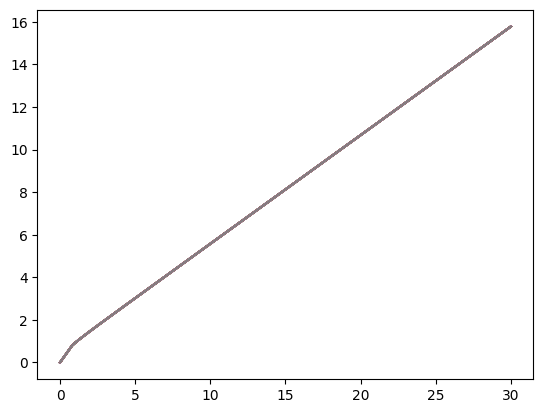

In [8]:
# Plot the marginal value function
M = np.linspace(0.0, 30, 300)
for p in range(MedicalExample.pLvlGrid[0].size):
    pLvl = MedicalExample.pLvlGrid[0][p]
    M_temp = pLvl * M + MedicalExample.solution[0].mLvlMin(pLvl)
    P = pLvl * np.ones_like(M)
    vP = MedicalExample.solution[0].vPfunc(M_temp, P) ** (-1.0 / MedicalExample.CRRA)
    plt.plot(M_temp, vP)
print("Marginal value function (pseudo inverse)")
plt.show()

In [9]:
if MedicalExample.vFuncBool:
    # Plot the value function
    M = np.linspace(0.0, 1, 300)
    for p in range(MedicalExample.pLvlGrid[0].size):
        pLvl = MedicalExample.pLvlGrid[0][p]
        M_temp = pLvl * M + MedicalExample.solution[0].mLvlMin(pLvl)
        P = pLvl * np.ones_like(M)
        v = CRRAutility_inv(
            MedicalExample.solution[0].vFunc(M_temp, P), gam=MedicalExample.CRRA
        )
        plt.plot(M_temp, v)
    print("Value function (pseudo inverse)")
    plt.show()

In [10]:
if do_simulation:
    t_start = time()
    MedicalExample.T_sim = 100
    MedicalExample.track_vars = ["mLvl", "cLvl", "Med"]
    MedicalExample.make_shock_history()
    MedicalExample.initialize_sim()
    MedicalExample.simulate()
    t_end = time()
    print(
        "Simulating "
        + str(MedicalExample.AgentCount)
        + " agents for "
        + str(MedicalExample.T_sim)
        + " periods took "
        + mystr(t_end - t_start)
        + " seconds."
    )

/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/core.py:653: UserWarning: The option for reading shocks was activated but the model requires state PlvlAgg, not contained in newborn_init_history.
  warn(
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/HARK/core.py:840: UserWarning: The option for reading shocks was activated but the model requires state PlvlAgg, not contained in newborn_init_history.
  warn(


Simulating 10000 agents for 100 periods took 3.1362 seconds.
